# Extracting frames

In [ ]:
pip install ffmpeg

  Preparing metadata (setup.py) ... done
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6082 sha256=b1125445d1897b46fe1ebf0fea8c27f7a8e791dc9723da1eb5c87ad3936aab16
  Stored in directory: /root/.cache/pip/wheels/8e/7a/69/cd6aeb83b126a7f04cbe7c9d929028dc52a6e7d525ff56003a
Successfully built ffmpeg


In [ ]:
pip install moviepy

In [ ]:
import os
from moviepy.editor import VideoFileClip
from PIL import Image

def extract_frames(video_path, output_folder, interval=1):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Load the video clip
    clip = VideoFileClip(video_path)

    # Calculate the frame extraction times in seconds
    frame_times = [t for t in range(0, int(clip.duration), interval)]

    # Extract frames at each specified time
    for t in frame_times:
        frame = clip.get_frame(t)
        output_path = os.path.join(output_folder, f"frame_{t}.jpg")
        image = Image.fromarray(frame)
        image.save(output_path)

    # Close the original clip
    clip.close()

# Example usage
video_path = "/content/drive/MyDrive/video2.mp4"
output_folder = "/content/framess"
extract_frames(video_path, output_folder, interval=1)



In [ ]:
import subprocess
import os

def extract_frames(video_path, output_folder, num_frames):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # FFmpeg command to extract frames
    command = [
        'ffmpeg',
        '-i', video_path,                # Input file
        '-vf', f'fps={num_frames}/duration',  # Extract frames evenly distributed
        os.path.join(output_folder, 'frame_%04d.png')  # Output frames
    ]

    # Run FFmpeg command
    subprocess.run(command, check=True)

# Example usage
video_path = '/content/drive/MyDrive/video2.mp4'
output_folder = '/content/framess'
num_frames = 2071

extract_frames(video_path, output_folder, num_frames)


CalledProcessError: Command '['ffmpeg', '-i', '/content/drive/MyDrive/video2.mp4', '-vf', 'fps=2071/duration', '/content/drive/MyDrive/framess/frame_%04d.png']' returned non-zero exit status 1.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Installing the dependencies


In [ ]:
pip install autodistill autodistill-grounded-sam autodistill-yolov8


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


# Labelling the dataset


In [ ]:

##Labelling of first 16 frames of first video from the dataset

import os
import supervision as sv
import cv2
import shutil
from autodistill.detection import CaptionOntology
from autodistill_grounded_sam import GroundedSAM

# Define the ontology
ontology = CaptionOntology({
   "license plate" : "license plate"
})

IMAGES = "/content/drive/MyDrive/datasetforlabel/frames1/framesfinal"
DATASET_DIR_PATH = "/content/drive/MyDrive/datasetforlabel/dataset"

# Delete folder if it already exists
if os.path.exists(DATASET_DIR_PATH):
    shutil.rmtree(DATASET_DIR_PATH)

# Initialize the base model with the ontology
# We're using the GroundedSAM as our base model
base_model = GroundedSAM(ontology=ontology)

try:
    # Label the images
    dataset = base_model.label(
        input_folder=IMAGES,
        extension=".jpg",
        output_folder=DATASET_DIR_PATH
    )

    print("Labeling completed.")

except Exception as e:
    print(f"Error during labeling: {e}")
    raise


trying to load grounding dino directly
downloading dino model weights


final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Labeling /content/drive/MyDrive/datasetforlabel/frames1/framesfinal/frame_1079.jpg:   0%|          | 0/1772 [00:00<?, ?it/s]FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
Labeling /content/drive/MyDrive/datasetforlabel/frames1/framesfinal/frame_1077.jpg:   0%|          | 1/1772 [02:01<59:41:30, 121.34s/it]FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
Labeling /content/drive/MyDrive/datasetforlabel/frames1/framesfinal/frame_1111.jpg:   2%|▏         | 35/1772 [1:05:40<53:23:34, 110.66s/it]    

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wMIqnBgpzlmciNfWNM0A")
project = rf.workspace("anjelica-q9xkn").project("conversio-to-yolo")
version = project.version(1)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 994.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to conversio-to-yolo-1 in yolov8:: 100%|██████████| 202/202 [00:00<00:00, 6735.75it/s]


# Training target model

In [ ]:
# Install the required package for YOLOv8!
!pip install ultralytics

In [ ]:
from autodistill_yolov8 import YOLOv8

target_model = YOLOv8("/content/drive/MyDrive/fine tune/best (1).pt")
target_model.train("/content/drive/MyDrive/fine tune/dataset/data.yaml", epochs=20)


New https://pypi.org/project/ultralytics/8.2.65 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/fine tune/best (1).pt, data=/content/drive/MyDrive/fine tune/dataset/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic

# Running inference on video

In [ ]:
!pip install supervision



In [ ]:
import numpy as np
import supervision as sv
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/runs/detect/train/weights/best.pt")
box_annotator = sv.BoundingBoxAnnotator()

def callback(frame: np.ndarray, _: int) -> np.ndarray:
    results = model(frame)[0]
    detections = sv.Detections.from_ultralytics(results)
    return box_annotator.annotate(frame.copy(), detections=detections)

sv.process_video(
    source_path="/content/drive/MyDrive/video2.mp4",
    target_path="/content/drive/MyDrive/output.mp4",
    callback=callback
)

Streaming output truncated to the last 5000 lines.
0: 384x640 (no detections), 10.8ms
Speed: 0.6ms preprocess, 10.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 (no detections), 17.4ms
Speed: 0.7ms preprocess, 17.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 (no detections), 15.6ms
Speed: 1.2ms preprocess, 15.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 2 license plates, 11.6ms
Speed: 0.7ms preprocess, 11.6ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 11.3ms
Speed: 0.7ms preprocess, 11.3ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 14.2ms
Speed: 0.6ms preprocess, 14.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 1 license plate, 11.3ms
Speed: 0.7ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 3 lice

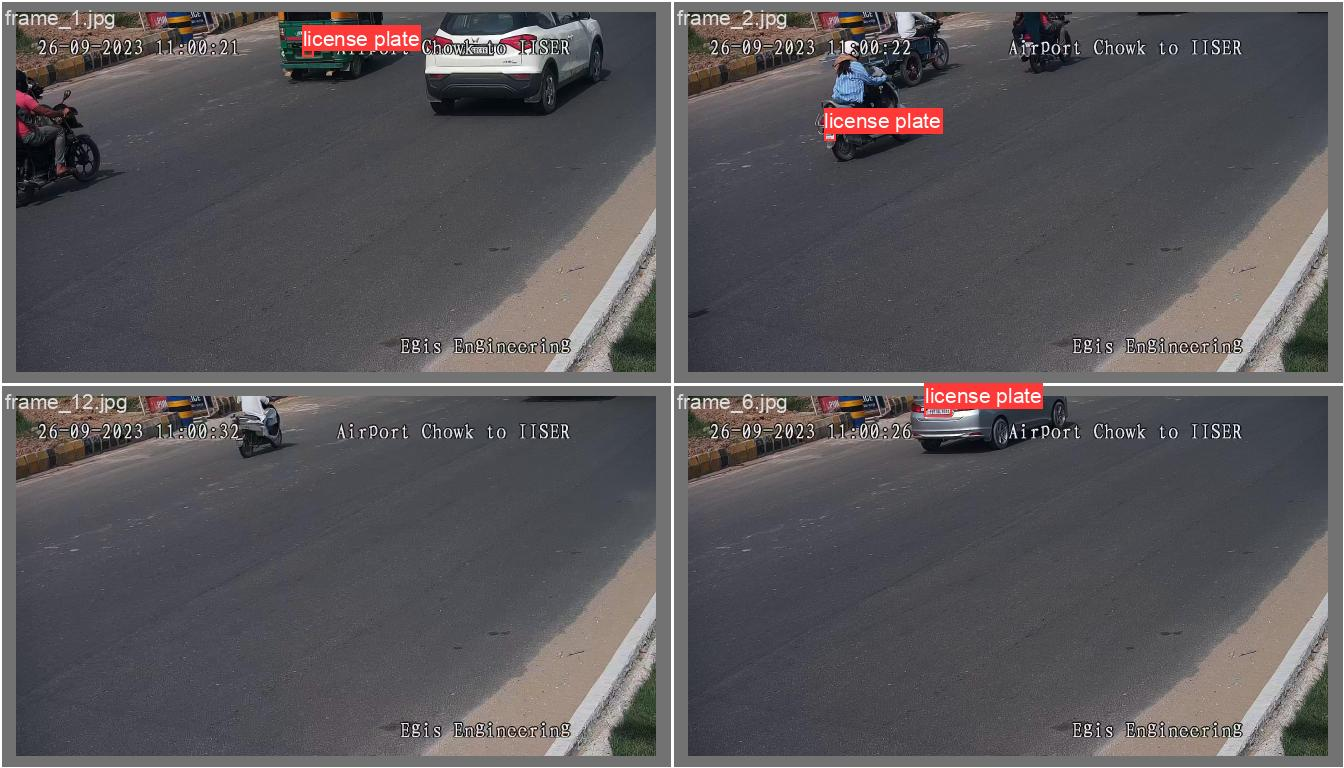

In [ ]:
from IPython.display import Image

Image(filename="/content/drive/MyDrive/autolabel/runs/detect/train/val_batch0_labels.jpg")


In [ ]:
!pip install -qq  autodistill
!pip install -qq  autodistill-grounded-sam
!pip install -qq  roboflow
!pip install -qq  supervision==0.9.0
#!pip install -qq git+https://github.com/pytube/pytube

In [ ]:
import supervision as sv
from tqdm.notebook import tqdm
import cv2
import subprocess
import os
from autodistill.detection import CaptionOntology
from autodistill_grounded_sam import GroundedSAM

import glob
from pytube import YouTube

import IPython.display as display
from IPython.display import Video

In [ ]:
def annot_wrapper_to_video(image_names, video_properties,out_video_name = './output.mp4', temp_path_video = './temp.mp4'):
    mask_annotator = sv.MaskAnnotator()
    box_annotator = sv.BoxAnnotator()

    out = cv2.VideoWriter(
        temp_path_video,
        cv2.VideoWriter_fourcc(*'MP4V'),
        video_properties['fps']/2,
        (video_properties['width'], video_properties['height']))

    for image_name in image_names:
        image = dataset.images[image_name]
        annotations = dataset.annotations[image_name]
        labels = [
            dataset.classes[class_id]
            for class_id
            in annotations.class_id]
        annotates_image = mask_annotator.annotate(
            scene=image.copy(),
            detections=annotations)
        annotates_image = box_annotator.annotate(
            scene=annotates_image,
            detections=annotations,
            labels=labels)


        out.write(annotates_image)
    out.release()

    if os.path.exists(out_video_name):
        os.remove(out_video_name)

    subprocess.run(
    [
        "ffmpeg",  "-i", temp_path_video, "-crf",
        "18", "-preset", "veryfast", "-hide_banner", "-loglevel",
        "error", "-vcodec", "libx264", out_video_name
    ])
    os.remove(temp_path_video)

In [ ]:
out_video_name = './output.mp4'
annot_wrapper_to_video(list(dataset.images.keys()),
                      video_properties = video_properties,
                       out_video_name = out_video_name)

In [ ]:
Video(data=out_video_name, embed=True, height=int(video_properties['height'] * 0.5), width=int(video_properties['width'] * 0.5))